# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [2]:
def F(n):
    for i in range(n):
        l=''
        l+='-'*(n-i-1)
        for j in range(i+1,0,-1):
            l+=chr(65+j-1)
        for j in range(1,i+1):
            l+=chr(65+j)
        l+='-'*(n-i-1)
        print(l)
    pass

# Tests
F(4)
F(10)
F(6)

---A---
--BAB--
-CBABC-
DCBABCD
---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [3]:
def F(d : dict):
    #sort by key asc
    print("Sorted by keys, asc")
    kl=list(d.keys())
    kl.sort()
    for i in kl:
        print(f"-{i}-, -{d[i][0]}-, -{d[i][1]}-")
    #sort by x desc
    print("Sorted by x, desc")
    vl=list(d.values())
    vlx=[i[0] for i in vl]
    vlx.sort(reverse=True)
    dx=d.copy()
    for i in vlx:
        for j in dx.copy():
            if dx[j][0]==i:
                print(f"-{j}-, -{dx[j][0]}-, -{dx[j][1]}-")
                dx.pop(j)
    
    
    #sort by y asc
    print("Sorted by y, asc")
    vly=[i[1] for i in vl]
    vly.sort()
    dy=d.copy()
    for i in vly:
        for j in dy.copy():
            if dy[j][1]==i:
                print(f"-{j}-, -{dy[j][0]}-, -{dy[j][1]}-")
                dy.pop(j)

    
    pass

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by keys, asc
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-
Sorted by x, desc
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-
Sorted by y, asc
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys, asc
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-
Sorted by x, desc
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-
Sorted by y, asc
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [4]:

with open("student_records.csv","r") as f:
    for i in range (10):
        l=f.readline()
        print(l)
    pass 


roll_number,department,credit,course_name,course_type,grade

588946,MA,3,EC250,hasmed_elective,AB

145372,EP,4,EP407,hasmed_elective,CC

834515,MA,8,EP885,hasmed_elective,BB

344265,CSE,6,CSE699,honours,AB

358405,MA,3,EE460,minor,AP

781075,CE,8,CE540,honours,CC

180828,CSE,6,CE880,minor,AB

981238,MM,4,CSE226,minor,AB

836881,MM,8,MM530,core,AA



#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [5]:
class Student:
    def __init__(self,l):
        self.courses={'core':[],'d_elective':[],'f_elective':[],'h_elective':[],'honours':[],'alc':[],'minor':[]}
        self.courses_credits={'core':0,'d_elective':0,'f_elective':0,'h_elective':0,'honours':0,'alc':0,'minor':0}
        self.weighted_sum={'core':0,'d_elective':0,'f_elective':0,'h_elective':0,'honours':0,'alc':0,'minor':0}
        grade={'AP\n':10,'AA\n':10,'AB\n':9,'BB\n':8,'BC\n':7,'CC\n':6}
        
        for i in l:
            i[0]=int(i[0])
            if i[2]=='core':
                self.courses['core'].append(i)
                self.courses_credits['core']+=i[0]
                self.weighted_sum['core']+=i[0]*grade[i[3]]
            
            elif i[2]=='department_elective':
                self.courses['d_elective'].append(i)
                self.courses_credits['d_elective']+=i[0]
                self.weighted_sum['d_elective']+=i[0]*grade[i[3]]
            
            elif i[2]=='flexible_elective':
                self.courses['f_elective'].append(i)
                self.courses_credits['f_elective']+=i[0]
                self.weighted_sum['f_elective']+=i[0]*grade[i[3]]
            
            elif i[2]=='hasmed_elective':
                self.courses['h_elective'].append(i)
                self.courses_credits['h_elective']+=i[0]
                self.weighted_sum['h_elective']+=i[0]*grade[i[3]]
                
            elif i[2]=='honours':
                self.courses['honours'].append(i)
                self.courses_credits['honours']+=i[0]
                self.weighted_sum['honours']+=i[0]*grade[i[3]]
            elif i[2]=='alc':
                self.courses['alc'].append(i)
                self.courses_credits['alc']+=i[0]
                self.weighted_sum['alc']+=i[0]*grade[i[3]] 
            elif i[2]=='minor':
                self.courses['minor'].append(i)
                self.courses_credits['minor']+=i[0]
                self.weighted_sum['minor']+=i[0]*grade[i[3]] 

        self.total_creds=self.courses_credits['core']+self.courses_credits['d_elective']+self.courses_credits['f_elective']+self.courses_credits['h_elective'] +self.courses_credits['honours']+self.courses_credits['alc']+self.courses_credits['minor']
        self.cpi=self.calc_cpi()  
    
    def calc_cpi(self):
        cpi=(self.weighted_sum['core']+self.weighted_sum['d_elective']+self.weighted_sum['f_elective']+self.weighted_sum['h_elective'])/(self.courses_credits['core']+self.courses_credits['d_elective']+self.courses_credits['f_elective']+self.courses_credits['h_elective'])
        return cpi


    def __str__(self):
        return f"Courses: {self.courses}"

    pass


with open("student_records.csv","r") as f:
    data=f.readlines()
    for i in range(len(data)):
        data[i]=data[i].split(",")

uni_roll={}

for i in data[1:]:
    if i[0] not in list(uni_roll.keys()):
        uni_roll[i[0]]=[]
        uni_roll[i[0]].append(i[2:])
    else:
        uni_roll[i[0]].append(i[2:])

print(len(list(uni_roll.keys()))) #number of students

for i in list(uni_roll.keys()):
    uni_roll[i]=Student(uni_roll[i])

for i in list(uni_roll.keys()):
    print(f"Roll No: {i} has CPI: {'%.3f'%(uni_roll[i].cpi)} and has taken total {uni_roll[i].total_creds} credits.") 



100
Roll No: 588946 has CPI: 8.670 and has taken total 199 credits.
Roll No: 145372 has CPI: 7.429 and has taken total 173 credits.
Roll No: 834515 has CPI: 8.103 and has taken total 199 credits.
Roll No: 344265 has CPI: 8.900 and has taken total 153 credits.
Roll No: 358405 has CPI: 8.208 and has taken total 206 credits.
Roll No: 781075 has CPI: 8.470 and has taken total 246 credits.
Roll No: 180828 has CPI: 7.904 and has taken total 177 credits.
Roll No: 981238 has CPI: 8.275 and has taken total 168 credits.
Roll No: 836881 has CPI: 7.922 and has taken total 246 credits.
Roll No: 310604 has CPI: 8.217 and has taken total 198 credits.
Roll No: 847809 has CPI: 8.270 and has taken total 261 credits.
Roll No: 773982 has CPI: 7.784 and has taken total 264 credits.
Roll No: 500658 has CPI: 8.117 and has taken total 208 credits.
Roll No: 810863 has CPI: 8.056 and has taken total 192 credits.
Roll No: 124663 has CPI: 8.230 and has taken total 229 credits.
Roll No: 364146 has CPI: 8.766 and h

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [ ]:
n=0
for i in list(uni_roll.keys()):

    if uni_roll[i].courses_credits['core']>=20 and uni_roll[i].courses_credits['d_elective']>=15 and uni_roll[i].courses_credits['f_elective']>=10 and uni_roll[i].courses_credits['h_elective']>=5:
        print(f"Roll No: {i} meets the graduation requirements.")
        n+=1

print(n) #number of students who meet the graduation requirements


Roll No: 588946 meets the graduation requirements.
Roll No: 834515 meets the graduation requirements.
Roll No: 781075 meets the graduation requirements.
Roll No: 180828 meets the graduation requirements.
Roll No: 981238 meets the graduation requirements.
Roll No: 836881 meets the graduation requirements.
Roll No: 310604 meets the graduation requirements.
Roll No: 773982 meets the graduation requirements.
Roll No: 500658 meets the graduation requirements.
Roll No: 810863 meets the graduation requirements.
Roll No: 124663 meets the graduation requirements.
Roll No: 871746 meets the graduation requirements.
Roll No: 986057 meets the graduation requirements.
Roll No: 379479 meets the graduation requirements.
Roll No: 144528 meets the graduation requirements.
Roll No: 485484 meets the graduation requirements.
Roll No: 845623 meets the graduation requirements.
Roll No: 150503 meets the graduation requirements.
Roll No: 214270 meets the graduation requirements.
Roll No: 517837 meets the gradu

#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [16]:
for i in list(uni_roll.keys()):

    if uni_roll[i].courses_credits['minor']>=10:
        print(f"Roll No: {i} completed minor.")
        

Roll No: 588946 completed minor.
Roll No: 145372 completed minor.
Roll No: 834515 completed minor.
Roll No: 344265 completed minor.
Roll No: 358405 completed minor.
Roll No: 781075 completed minor.
Roll No: 180828 completed minor.
Roll No: 981238 completed minor.
Roll No: 836881 completed minor.
Roll No: 847809 completed minor.
Roll No: 773982 completed minor.
Roll No: 500658 completed minor.
Roll No: 810863 completed minor.
Roll No: 124663 completed minor.
Roll No: 364146 completed minor.
Roll No: 871746 completed minor.
Roll No: 270007 completed minor.
Roll No: 597353 completed minor.
Roll No: 986057 completed minor.
Roll No: 718510 completed minor.
Roll No: 836431 completed minor.
Roll No: 379479 completed minor.
Roll No: 582912 completed minor.
Roll No: 788020 completed minor.
Roll No: 613401 completed minor.
Roll No: 144528 completed minor.
Roll No: 485484 completed minor.
Roll No: 680096 completed minor.
Roll No: 199713 completed minor.
Roll No: 851029 completed minor.
Roll No: 8

#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [10]:
n=0
for i in list(uni_roll.keys()):

    if uni_roll[i].courses_credits['core']>=20  and uni_roll[i].courses_credits['honours']>=10:
        print(f"Roll No: {i} completed honours.")
        n+=1

print(n) #number of students who completed honours

Roll No: 588946 completed honours.
Roll No: 145372 completed honours.
Roll No: 834515 completed honours.
Roll No: 781075 completed honours.
Roll No: 836881 completed honours.
Roll No: 310604 completed honours.
Roll No: 773982 completed honours.
Roll No: 500658 completed honours.
Roll No: 810863 completed honours.
Roll No: 124663 completed honours.
Roll No: 364146 completed honours.
Roll No: 871746 completed honours.
Roll No: 986057 completed honours.
Roll No: 718510 completed honours.
Roll No: 379479 completed honours.
Roll No: 582912 completed honours.
Roll No: 788020 completed honours.
Roll No: 613401 completed honours.
Roll No: 144528 completed honours.
Roll No: 485484 completed honours.
Roll No: 199713 completed honours.
Roll No: 845623 completed honours.
Roll No: 150503 completed honours.
Roll No: 214270 completed honours.
Roll No: 517837 completed honours.
Roll No: 482623 completed honours.
Roll No: 721490 completed honours.
Roll No: 955757 completed honours.
Roll No: 589528 comp

# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [13]:

%pip install scipy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import scipy
from scipy.optimize import minimize
# Define the function to minimize
def func(x):
    return 2 * (x[0] - x[1] - 3)**2 + 4 * (x[0] + 2 * x[1] + 1)**4

# Define the constraints
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - x[1] + 3},
        {'type': 'ineq', 'fun': lambda x: 5 - ((x[0] + 2)**2 + (x[1] + 1)**2)})

# Initial guess
x0 = [0, 0]

# Perform the minimization
result = minimize(func, x0, constraints=cons)

print("Optimal value:", result.fun)
print("Optimal point:", result.x)

Optimal value: 7.345026216977713
Optimal point: [ 0.23492503 -0.92851488]


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [ ]:
import numpy as np
from scipy import integrate

def integrand(t):
    # Parameterization 
    x = np.sqrt(3) * np.cos(t)
    y = np.sqrt(3) * np.sin(t)
    
    # Function f(x,y) = x^2 + y^4
    f = x**2 + y**4
    
    # ds/dt = √((dx/dt)^2 + (dy/dt)^2)
    dx_dt = -np.sqrt(3) * np.sin(t)
    dy_dt = np.sqrt(3) * np.cos(t)
    ds_dt = np.sqrt(dx_dt**2 + dy_dt**2)
    
    return f * ds_dt

# Integrate from 0 to 2π for full circle
result, error = integrate.quad(integrand, 0, 2*np.pi)

print(f"Line integral = {result:.6f}")
print(f"Error estimate = {error:.6e}")

Line integral = 53.053631
Error estimate = 5.376844e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [ ]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt



In [19]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(path):
    return np.loadtxt(path, delimiter=',')

In [20]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        #Get the total number of rows in the dataset
        total_rows = data.shape[0]
         # Create an array of all row indices
        row_indices = np.arange(total_rows)

        # Randomly select K unique indices from the array of row indices
        random_indices = np.random.choice(row_indices, size=K, replace=False)
 
        return data[random_indices]
   
    return init_centers

In [21]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N
def initialise_labels(data):
    return np.ones(data.shape[0])

In [22]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    return np. linalg.norm(data[:, np.newaxis] - centers, axis=2)

In [23]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return distances.argmin(axis=-1)

In [26]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    # stores the sum of the data points assigned to each center
    sums = np.zeros((K, 2))
    np.add.at(sums, labels, data)
    # return the mean of the data points assigned to each center
    return sums / np.bincount(labels).reshape(K, -1)


In [25]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    # Terminates if the labels are the same for two consecutive iterations
    return np.all(labels1 == labels2)

In [27]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [28]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.xlabel('Longitude')

    ### Set ylabel as 'Latitude'
    plt.ylabel('Latitude')

    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')


    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.0023310184478759766


<module 'matplotlib.pyplot' from '/Users/abhay/Library/Python/3.11/lib/python/site-packages/matplotlib/pyplot.py'>

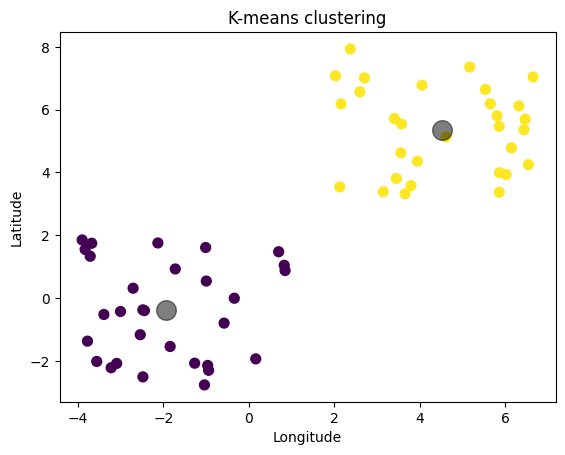

In [29]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)